## Advanced Regression Assignment

#### Problem Statement
    A US based housing company called Surprise Housing wants to enter Australian Market.  The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 
    
    The Company is looking for buying prospective properties and enter the market. 
    
    This assignment aims to come up with  a regression model using regularisation technique in order to predict the actual value of the prospective properties and help the company decide whether to invest in them or not

### Step 1: Reading and Understanding Data

  Import libraries, read the data file and understand what has been provided

In [1]:
## Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the provided file
housing_data = pd.read_csv("train.csv")

In [3]:
housing_data.head(25)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
## In total, there are 81 columns and 1460 rows in the dataset
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### From the above data structure, we can observe that there are few columns havig NULL. We will deal with each one of them next.

### Step 2: Data Cleansing and preparation

From the provided data dictionary, we see that most of these columns are categorical variables.

We would first look into Null values present in these columns, identify columns that we would keep for the modeling, convert categorical values to numeric format using label encoding technique and apply min-max scalar for columns having continous data

### Step 2.1 Handing Missing values in the dataset

In [5]:
## id column is just an index. We will remove from the dataset
housing_data_prep=housing_data.drop(["Id"],axis=1)

#### From the data structure, we observe that some of the columns are having very few values and the remaining are null.

   1. Alley - 91 not null values
   2. MasVnrType - 588 not null values
   3. FireplaceQu - 770 not null values
   4. PoolQC - 7 not null values
   5. Fence - 281 not null values
   6. MiscFeature - 584 not null values
   
  According to data dictionary, the null values indicate that these attributes are not present. For example, Alley having 1369 out of 1460 values as null indicates that these houses do not have Alley.  Since there is not much variation in the data, it will not be useful for Regression Analysis modeling.  Hence removing this column from the dataset. Similary, other columns listed above have atleast more than 45% of the data missing. Hence removing them from our analysis.

In [6]:
## Dropping columns with missing values
housing_data_prep=housing_data_prep.drop(["Alley","MasVnrType","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1)

In [7]:
housing_data_prep.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


#### We will observe other categorical columns one by one

### Step 2.2 Data Visualization of Categorical Variables

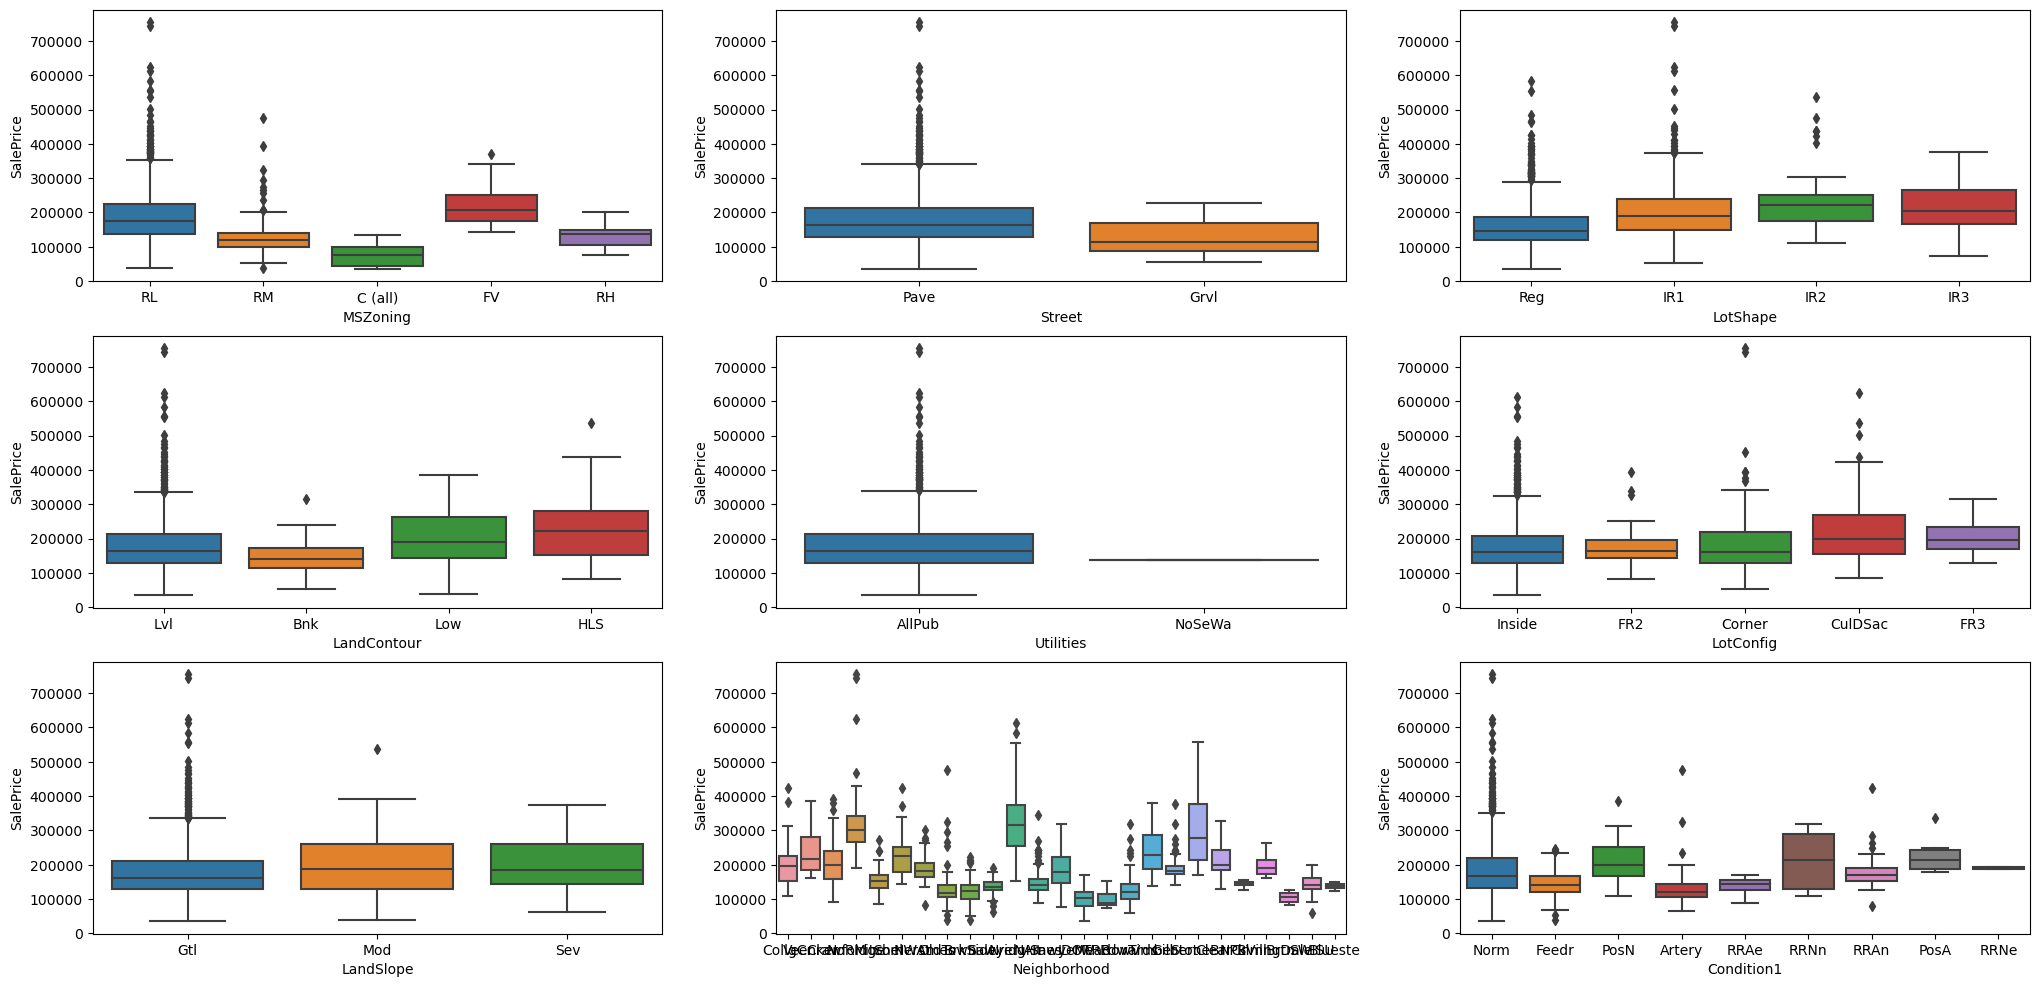

In [8]:
# Boxplot for categorical variables to visualize data
vars_cat = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
'Condition1']


plt.figure(figsize=(25, 12))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=housing_data_prep, x=i[1], y='SalePrice')
plt.show()

#### From the above chart we observe that for Utilies variable all except one row have the same value - AllPub. Only one row has NoSeWa

#### Hence will drop this column from the dataset

In [9]:
housing_data_prep=housing_data_prep.drop(["Utilities"],axis=1)

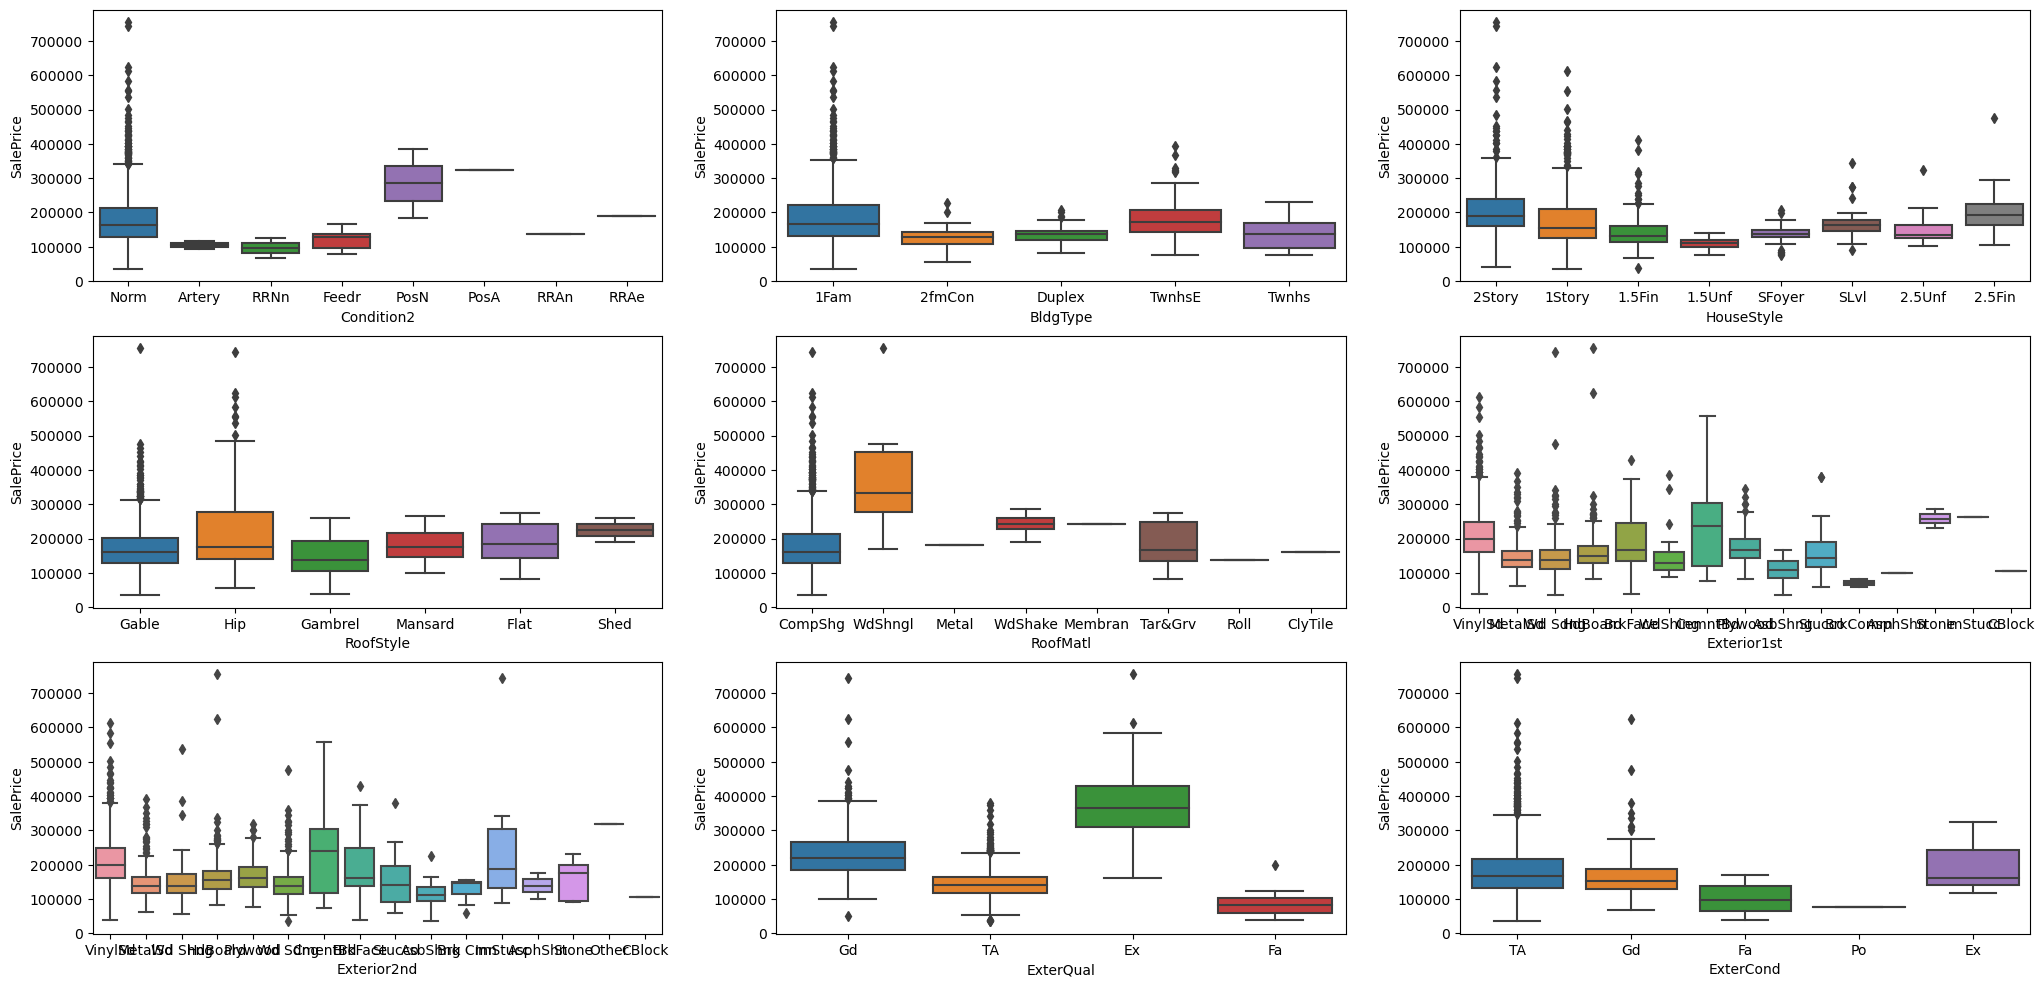

In [10]:
## Looking at BoxPlot for next set of categorical variables
vars_cat = ['Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond']


#'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
#'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','GarageType','GarageFinish',
#'GarageQual','GarageCond','PavedDrive','SaleType','SaleCondition']

plt.figure(figsize=(25, 12))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=housing_data_prep, x=i[1], y='SalePrice')
plt.show()

#### The variables Condition2, RoofMatl, Exterior1st, Exterior2nd and ExterCond have only one value for few records.  

#### There are outliers observed with respect the salesprice. We will keep all these data for our analysis

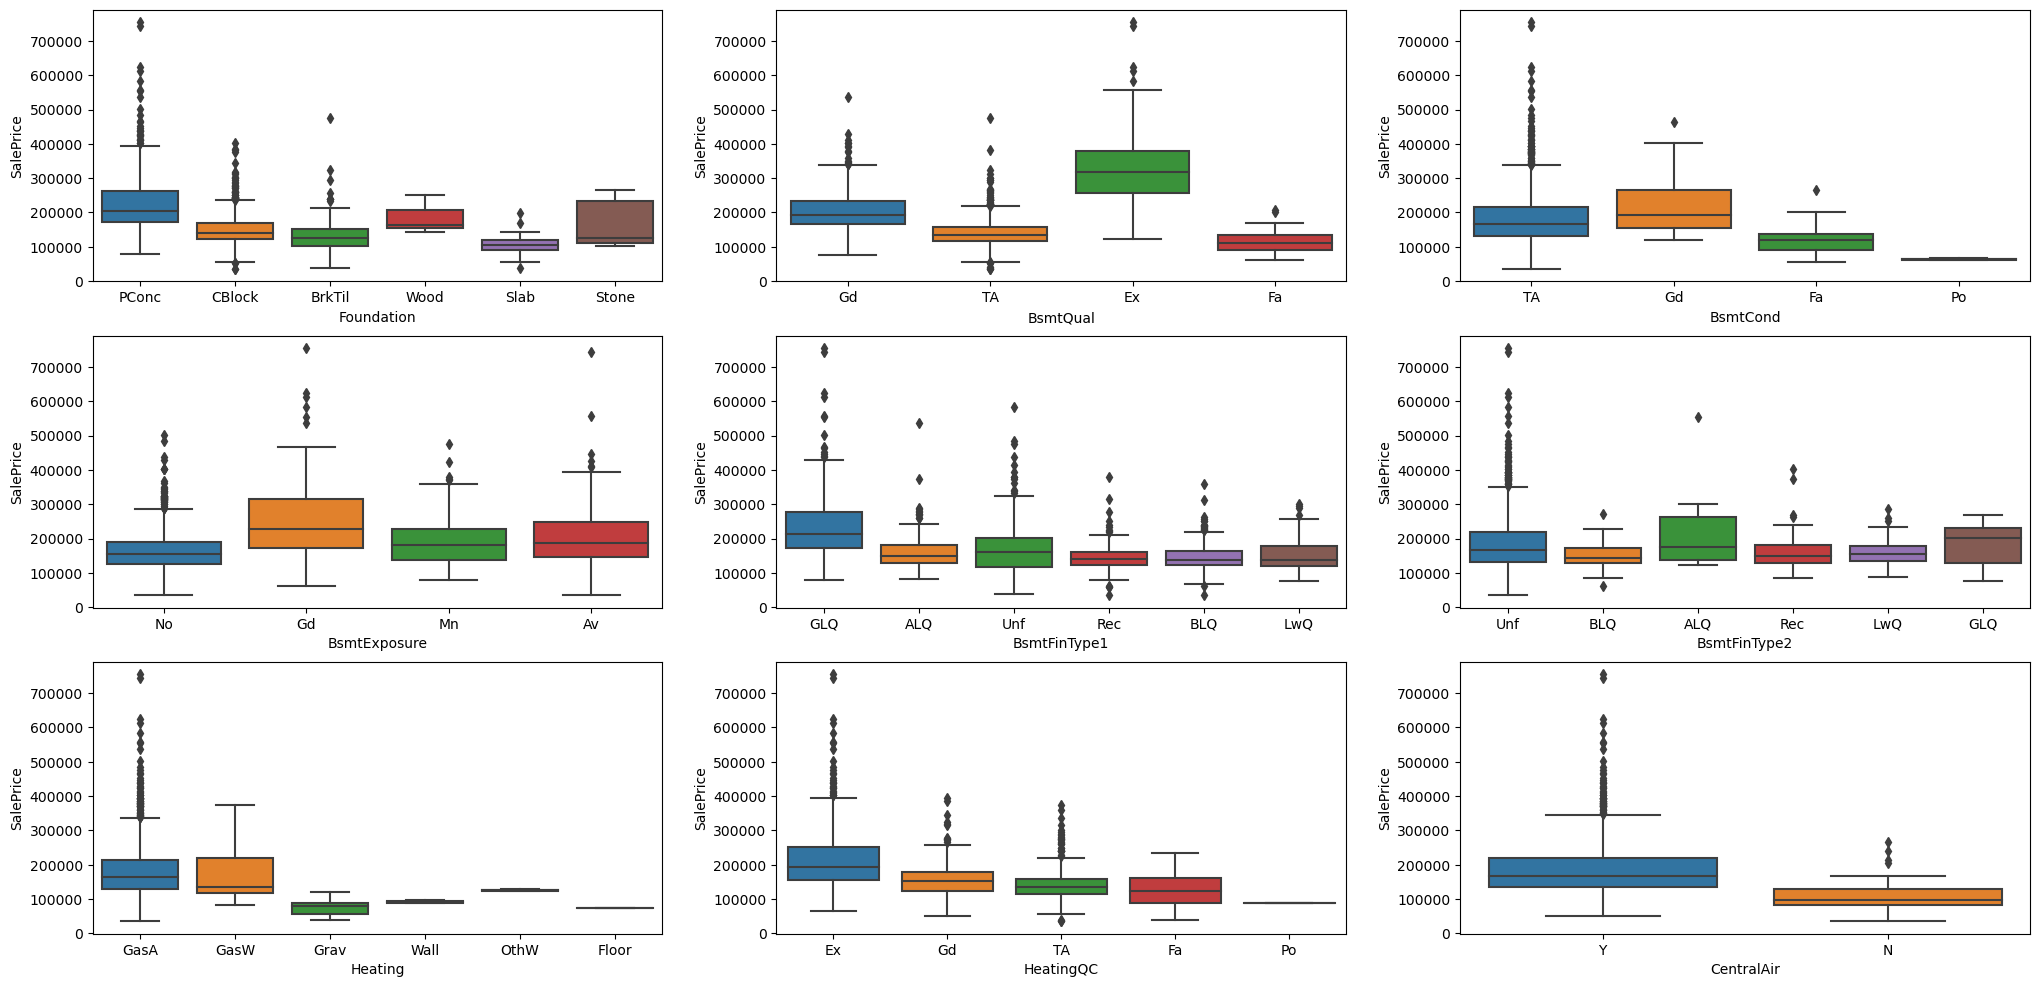

In [11]:
## Looking at BoxPlot for next set of categorical variables
vars_cat = ['Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir']

plt.figure(figsize=(25, 12))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=housing_data_prep, x=i[1], y='SalePrice')
plt.show()

#### Columns BsmtCond, Heating, HeatingQC have one value present. There are outlies observed on all vairables.  We will keep all of them for our analysis

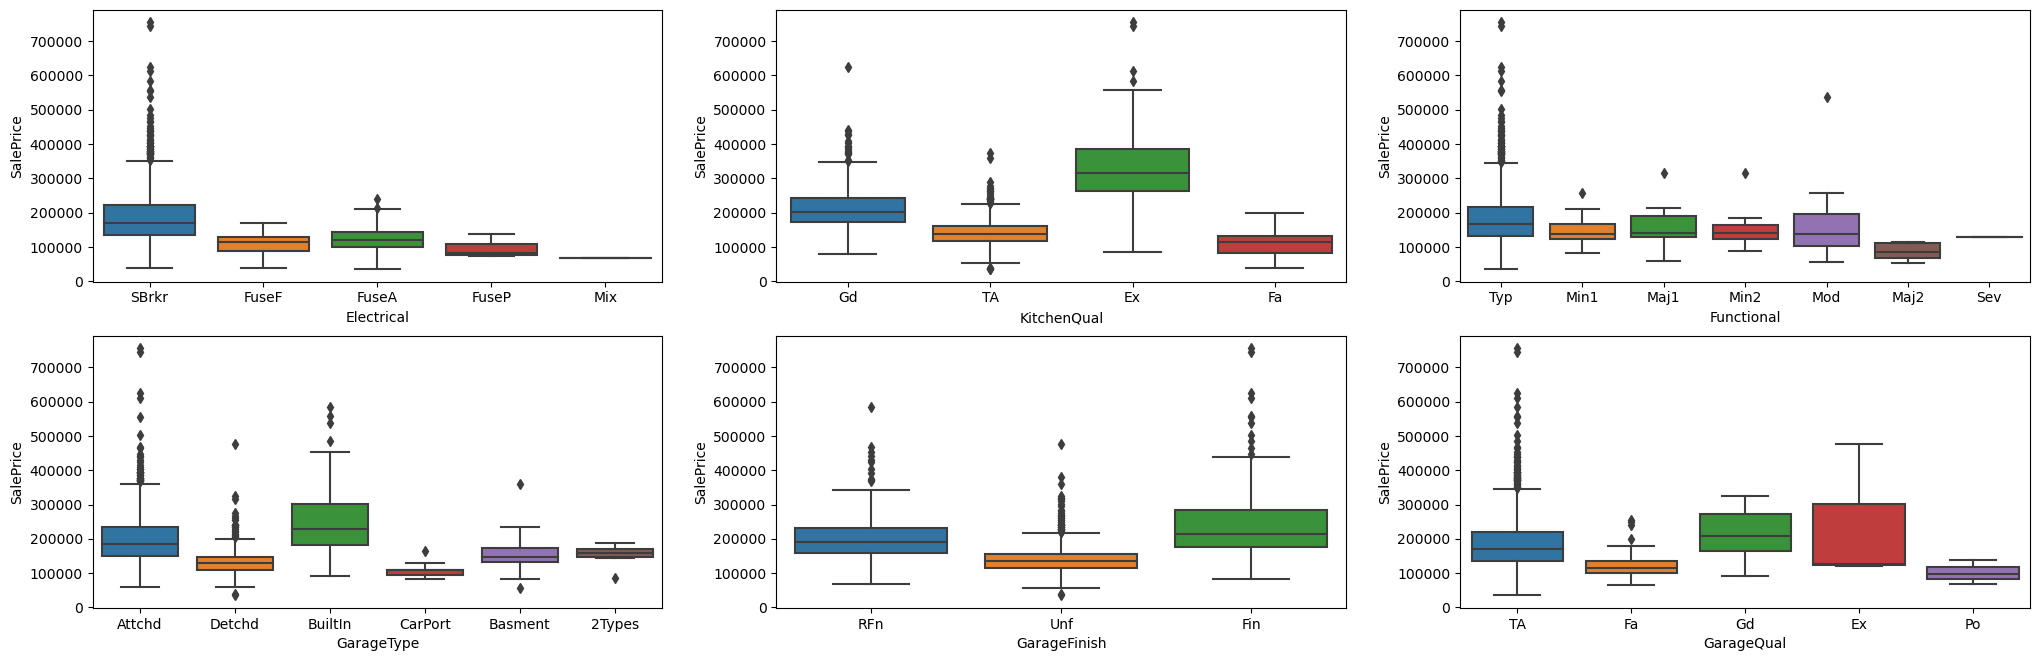

In [12]:
## Looking at BoxPlot for next set of categorical variables
vars_cat = ['Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual']


#'GarageCond','PavedDrive','SaleType','SaleCondition']

plt.figure(figsize=(25, 12))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=housing_data_prep, x=i[1], y='SalePrice')
plt.show()

#### All variables have outliers and the variable Functional has one value present for a record.  We will keep all these for further analysis

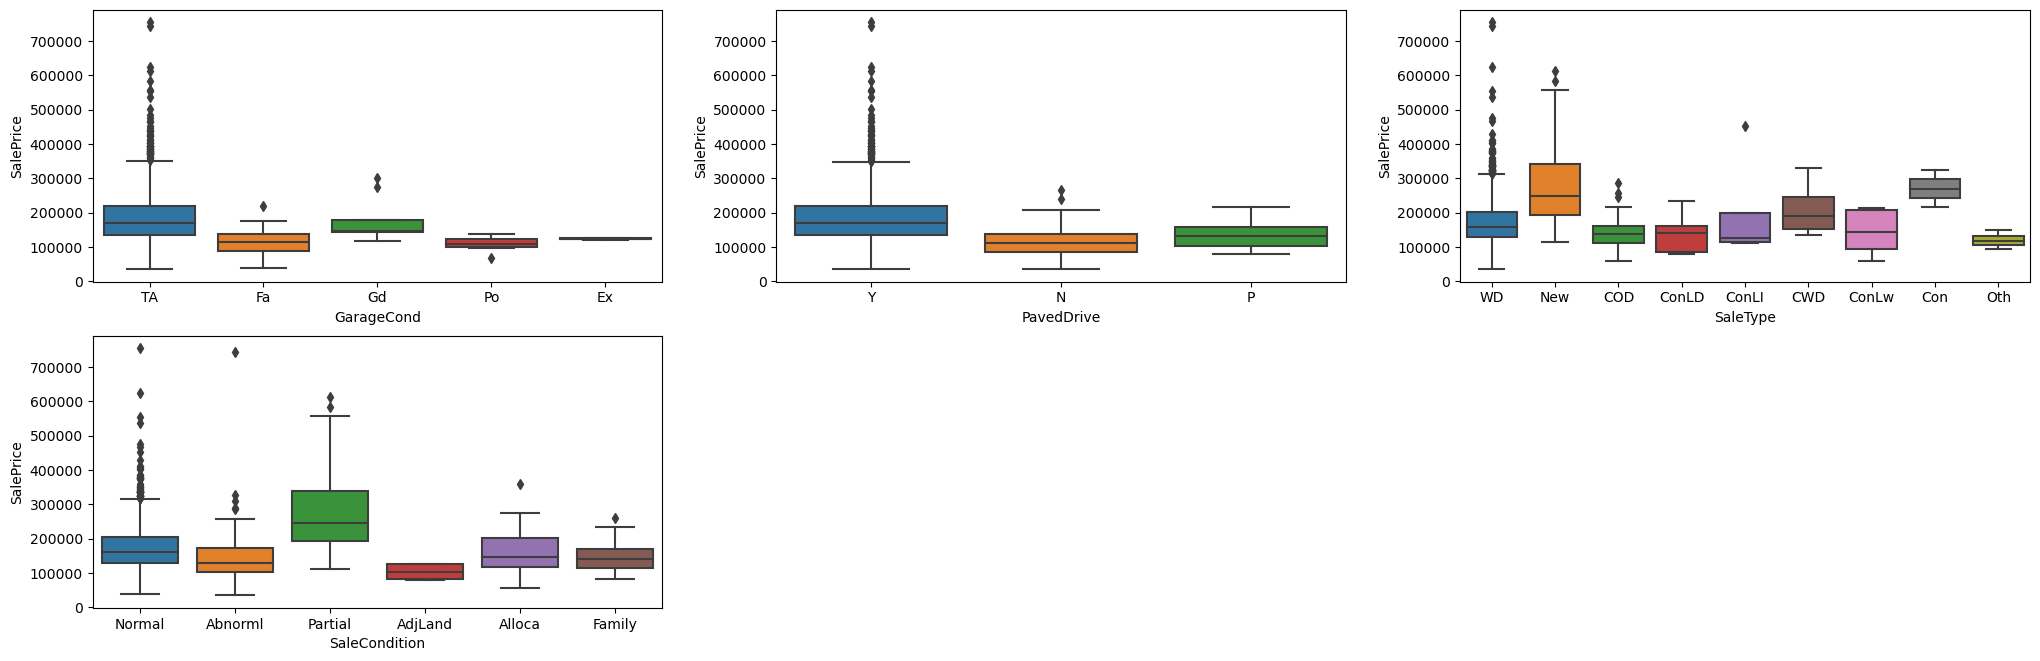

In [13]:
## Looking at BoxPlot for next set of categorical variables
vars_cat = ['GarageCond','PavedDrive','SaleType','SaleCondition']

plt.figure(figsize=(25, 12))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=housing_data_prep, x=i[1], y='SalePrice')
plt.show()

#### We will keep all these variables for analysis.

### Step 2.3 Imputing values where relevant

#### We observed that some of the categorical variables are having Null values. From the data dictionary, these are actually valid values with the values as None. Next we will impute the Null values on the Categorical variables to None.

In [14]:
## Looking into LotFrontage column values
housing_data_prep["LotFrontage"].isna().sum()

259

In [15]:
## Impute the mean value where the values are not found
housing_data_prep["LotFrontage"]=housing_data_prep["LotFrontage"].fillna(round(housing_data_prep["LotFrontage"].mean(),1))

In [16]:
## Next, check MasVnrArea column for null values. This should contain a numeric value that stores Masonry veneer area in square feet
housing_data_prep["MasVnrArea"].isna().sum()

8

In [17]:
## Replace these 8 values with the average of the remaining values
housing_data_prep["MasVnrArea"]=housing_data_prep["MasVnrArea"].fillna(round(housing_data_prep["MasVnrArea"].mean(),1))

In [18]:
# Find the values present in BsmtQual column
housing_data_prep["BsmtQual"].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [19]:
housing_data_prep["BsmtQual"].isna().sum()

37

In [20]:
## There are 37 Null values. According to data dictionary, these values should be considered as NA - No Basement.  
## Replace the null values with None
housing_data_prep["BsmtQual"]=housing_data_prep["BsmtQual"].fillna("None")

In [21]:
# Check the values present in BsmtQual column now
housing_data_prep["BsmtQual"].value_counts()

BsmtQual
TA      649
Gd      618
Ex      121
None     37
Fa       35
Name: count, dtype: int64

In [22]:
## Check for BsmtCond column
housing_data_prep["BsmtCond"].isna().sum()

37

In [23]:
## From data dictionary, these values are considered as No Basement. We will impute the values as None
housing_data_prep["BsmtCond"]=housing_data_prep["BsmtCond"].fillna("None")

In [24]:
housing_data_prep["BsmtCond"].value_counts()

BsmtCond
TA      1311
Gd        65
Fa        45
None      37
Po         2
Name: count, dtype: int64

In [25]:
## Look into BsmtExposure column
housing_data_prep["BsmtExposure"].isna().sum()

38

In [26]:
## From data dictionary, these values are considered as No Walkout or Garden level walls. We will impute the values as None
## to indicate there is no basement
housing_data_prep["BsmtExposure"]=housing_data_prep["BsmtExposure"].fillna("None")

In [27]:
housing_data_prep["BsmtExposure"].value_counts()

BsmtExposure
No      953
Av      221
Gd      134
Mn      114
None     38
Name: count, dtype: int64

In [28]:
## Similary, replace No Basement values for column BsmtFinType1 with None
housing_data_prep["BsmtFinType1"]=housing_data_prep["BsmtFinType1"].fillna("None")

In [29]:
housing_data_prep["BsmtFinType1"].value_counts()

BsmtFinType1
Unf     430
GLQ     418
ALQ     220
BLQ     148
Rec     133
LwQ      74
None     37
Name: count, dtype: int64

In [30]:
## Similary, replace No Basement values for column BsmtFinType2 with None
housing_data_prep["BsmtFinType2"]=housing_data_prep["BsmtFinType2"].fillna("None")

In [31]:
## Check values present in Electrical column
housing_data_prep["Electrical"].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [32]:
housing_data_prep["Electrical"].isna().sum()

1

In [33]:
## We observe that there is one value with a null.
## We shall replace this with the maximum value present - SBrkr so as to not visibility to the data during modeling
housing_data_prep["Electrical"]=housing_data_prep["Electrical"].fillna("SBrkr")

In [34]:
## Check values present in Electrical column
housing_data_prep["Electrical"].value_counts()

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [35]:
## Replace No Garage value (NA) with None for column GarageType
housing_data_prep["GarageType"]=housing_data_prep["GarageType"].fillna("None")

In [36]:
## GarageFinish -Replace No Garage value (NA) with None
housing_data_prep["GarageFinish"]=housing_data_prep["GarageFinish"].fillna("None")

In [37]:
## Similary, replace No Garage values (NA) with None for columns -  GarageQual and GarageCond
housing_data_prep["GarageQual"]=housing_data_prep["GarageQual"].fillna("None")
housing_data_prep["GarageCond"]=housing_data_prep["GarageCond"].fillna("None")

In [38]:
# Check the value of GarageQual
housing_data_prep["GarageQual"].value_counts()

GarageQual
TA      1311
None      81
Fa        48
Gd        14
Ex         3
Po         3
Name: count, dtype: int64

In [39]:
# Check the value of GarageCond
housing_data_prep["GarageCond"].value_counts()

GarageCond
TA      1326
None      81
Fa        35
Gd         9
Po         7
Ex         2
Name: count, dtype: int64

In [40]:
housing_data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

In [41]:
## Looking at  column GarageYrBlt, there are 79 missing values. Since this may not have any value add, we will drop this column as well
housing_data_prep=housing_data_prep.drop(["GarageYrBlt"],axis=1)


In [42]:
housing_data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 17  YearRemodAdd   1460 non-null   int64  
 18  RoofStyl

#### After performing the above cleanups, we see that all the columns have all values now and there are no nulls

### Step 2.4  Label Encoding categorical variables

In [43]:
## Examine MSSubClass
housing_data_prep["MSSubClass"].value_counts()

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [44]:
## Label Encode MSSubClass variable
encoder = LabelEncoder() 
housing_data_prep['MSSubClass_encoded'] = encoder.fit_transform(housing_data_prep['MSSubClass']) 
housing_data_prep.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MSSubClass_encoded
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,2,2008,WD,Normal,208500,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,5,2007,WD,Normal,181500,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,9,2008,WD,Normal,223500,5
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,0,0,0,0,2,2006,WD,Abnorml,140000,6
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,0,12,2008,WD,Normal,250000,5


In [45]:
## Label Encode MSZoning variable
housing_data_prep['MSZoning_encoded'] = encoder.fit_transform(housing_data_prep['MSZoning']) 

In [46]:
## Label Encode Street variable
housing_data_prep['Street_encoded'] = encoder.fit_transform(housing_data_prep['Street']) 

In [47]:
## Label Encode other categorical variables


## Label Encode LotShape variable
housing_data_prep['LotShape_encoded'] = encoder.fit_transform(housing_data_prep['LotShape']) 

## Label Encode LandContour variable
housing_data_prep['LandContour_encoded'] = encoder.fit_transform(housing_data_prep['LandContour']) 

## Label Encode LotConfig variable
housing_data_prep['LotConfig_encoded'] = encoder.fit_transform(housing_data_prep['LotConfig']) 

## Label Encode LandSlope variable
housing_data_prep['LandSlope_encoded'] = encoder.fit_transform(housing_data_prep['LandSlope']) 

## Label Encode Neighborhood variable
housing_data_prep['Neighborhood_encoded'] = encoder.fit_transform(housing_data_prep['Neighborhood']) 



## Label Encode Condition1 variable
housing_data_prep['Condition1_encoded'] = encoder.fit_transform(housing_data_prep['Condition1']) 

## Label Encode Condition2 variable
housing_data_prep['Condition2_encoded'] = encoder.fit_transform(housing_data_prep['Condition2']) 

## Label Encode BldgType variable
housing_data_prep['BldgType_encoded'] = encoder.fit_transform(housing_data_prep['BldgType']) 

## Label Encode HouseStyle variable
housing_data_prep['HouseStyle_encoded'] = encoder.fit_transform(housing_data_prep['HouseStyle']) 

## Label Encode RoofStyle variable
housing_data_prep['RoofStyle_encoded'] = encoder.fit_transform(housing_data_prep['RoofStyle']) 



## Label Encode RoofMatl variable
housing_data_prep['RoofMatl_encoded'] = encoder.fit_transform(housing_data_prep['RoofMatl']) 

## Label Encode Exterior1st variable
housing_data_prep['Exterior1st_encoded'] = encoder.fit_transform(housing_data_prep['Exterior1st']) 

## Label Encode Exterior2nd variable
housing_data_prep['Exterior2nd_encoded'] = encoder.fit_transform(housing_data_prep['Exterior2nd']) 

## Label Encode ExterQual variable
housing_data_prep['ExterQual_encoded'] = encoder.fit_transform(housing_data_prep['ExterQual']) 

## Label Encode ExterCond variable
housing_data_prep['ExterCond_encoded'] = encoder.fit_transform(housing_data_prep['ExterCond']) 



## Label Encode Foundation variable
housing_data_prep['Foundation_encoded'] = encoder.fit_transform(housing_data_prep['Foundation']) 

## Label Encode BsmtQual variable
housing_data_prep['BsmtQual_encoded'] = encoder.fit_transform(housing_data_prep['BsmtQual']) 

## Label Encode BsmtCond variable
housing_data_prep['BsmtCond_encoded'] = encoder.fit_transform(housing_data_prep['BsmtCond']) 

## Label Encode BsmtExposure variable
housing_data_prep['BsmtExposure_encoded'] = encoder.fit_transform(housing_data_prep['BsmtExposure']) 

## Label Encode BsmtFinType1 variable
housing_data_prep['BsmtFinType1_encoded'] = encoder.fit_transform(housing_data_prep['BsmtFinType1']) 



## Label Encode BsmtFinType2 variable
housing_data_prep['BsmtFinType2_encoded'] = encoder.fit_transform(housing_data_prep['BsmtFinType2']) 

## Label Encode Heating variable
housing_data_prep['Heating_encoded'] = encoder.fit_transform(housing_data_prep['Heating']) 

## Label Encode HeatingQC variable
housing_data_prep['HeatingQC_encoded'] = encoder.fit_transform(housing_data_prep['HeatingQC']) 

## Label Encode CentralAir variable
housing_data_prep['CentralAir_encoded'] = encoder.fit_transform(housing_data_prep['CentralAir']) 

## Label Encode Electrical variable
housing_data_prep['Electrical_encoded'] = encoder.fit_transform(housing_data_prep['Electrical']) 



## Label Encode KitchenQual variable
housing_data_prep['KitchenQual_encoded'] = encoder.fit_transform(housing_data_prep['KitchenQual']) 

## Label Encode Functional variable
housing_data_prep['Functional_encoded'] = encoder.fit_transform(housing_data_prep['Functional']) 

## Label Encode GarageType variable
housing_data_prep['GarageType_encoded'] = encoder.fit_transform(housing_data_prep['GarageType']) 

## Label Encode GarageFinish variable
housing_data_prep['GarageFinish_encoded'] = encoder.fit_transform(housing_data_prep['GarageFinish']) 

## Label Encode GarageQual variable
housing_data_prep['GarageQual_encoded'] = encoder.fit_transform(housing_data_prep['GarageQual']) 



## Label Encode GarageCond variable
housing_data_prep['GarageCond_encoded'] = encoder.fit_transform(housing_data_prep['GarageCond']) 

## Label Encode PavedDrive variable
housing_data_prep['PavedDrive_encoded'] = encoder.fit_transform(housing_data_prep['PavedDrive']) 

## Label Encode SaleType variable
housing_data_prep['SaleType_encoded'] = encoder.fit_transform(housing_data_prep['SaleType']) 

## Label Encode SaleCondition variable
housing_data_prep['SaleCondition_encoded'] = encoder.fit_transform(housing_data_prep['SaleCondition']) 

In [48]:
housing_data_prep.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,Electrical_encoded,KitchenQual_encoded,Functional_encoded,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,4,2,6,1,2,5,5,2,8,4
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,4,3,6,1,2,5,5,2,8,4
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,4,2,6,1,2,5,5,2,8,4
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,4,2,6,5,3,5,5,2,8,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,4,2,6,1,2,5,5,2,8,4


In [49]:
## Drop Categorical variables for which the label encoding is done
housing_data_prep=housing_data_prep.drop(['MSSubClass', 'MSZoning','Street','LotShape','LandContour','LotConfig',
                                          'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                                          'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','ExterQual','ExterCond',
                                          'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                                          'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional',
                                          'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive',
                                          'SaleType','SaleCondition',],axis=1)

In [50]:
housing_data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotFrontage            1460 non-null   float64
 1   LotArea                1460 non-null   int64  
 2   OverallQual            1460 non-null   int64  
 3   OverallCond            1460 non-null   int64  
 4   YearBuilt              1460 non-null   int64  
 5   YearRemodAdd           1460 non-null   int64  
 6   MasVnrArea             1460 non-null   float64
 7   BsmtFinSF1             1460 non-null   int64  
 8   BsmtFinSF2             1460 non-null   int64  
 9   BsmtUnfSF              1460 non-null   int64  
 10  TotalBsmtSF            1460 non-null   int64  
 11  1stFlrSF               1460 non-null   int64  
 12  2ndFlrSF               1460 non-null   int64  
 13  LowQualFinSF           1460 non-null   int64  
 14  GrLivArea              1460 non-null   int64  
 15  Bsmt

In [51]:
## Find how the values are spread statiscially using describe function
housing_data_prep.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Electrical_encoded,KitchenQual_encoded,Functional_encoded,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.041096,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685342,443.639726,46.549315,567.240411,...,3.682192,2.339726,5.749315,2.485616,1.876712,4.716438,4.763014,1.856164,7.513014,3.770548
std,22.024031,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,...,1.051301,0.830161,0.979659,1.933206,1.191646,0.898787,0.802670,0.496592,1.552100,1.100854
min,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,4.000000,2.000000,6.000000,1.000000,1.000000,5.000000,5.000000,2.000000,8.000000,4.000000
50%,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,4.000000,3.000000,6.000000,1.000000,2.000000,5.000000,5.000000,2.000000,8.000000,4.000000
75%,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,4.000000,3.000000,6.000000,5.000000,3.000000,5.000000,5.000000,2.000000,8.000000,4.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,4.000000,3.000000,6.000000,6.000000,3.000000,5.000000,5.000000,2.000000,8.000000,5.000000


## Step 3: Split dataset into Train and Test and apply min-max Scalar on Training set

In [52]:
pred_vars =  ['LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
                              'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                              'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                              'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea',
                              'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',
                              'MoSold','YrSold','MSSubClass_encoded','MSZoning_encoded','Street_encoded','LotShape_encoded','LandContour_encoded',
                              'LotConfig_encoded','LandSlope_encoded','Neighborhood_encoded',
                              'Condition1_encoded','Condition2_encoded','BldgType_encoded','HouseStyle_encoded',
                              'RoofStyle_encoded','RoofMatl_encoded','Exterior1st_encoded','Exterior2nd_encoded',
                              'ExterQual_encoded','ExterCond_encoded','Foundation_encoded',
                              'BsmtQual_encoded','BsmtCond_encoded','BsmtExposure_encoded','BsmtFinType1_encoded',
                              'BsmtFinType2_encoded','Heating_encoded','HeatingQC_encoded','CentralAir_encoded',
                              'Electrical_encoded','KitchenQual_encoded','Functional_encoded',
                              'GarageType_encoded','GarageFinish_encoded','GarageQual_encoded','GarageCond_encoded',
                              'PavedDrive_encoded','SaleType_encoded','SaleCondition_encoded']


response_var = ['SalePrice']

# split into X and y
X = housing_data_prep.loc[:,pred_vars] # predictors in variable X

y = housing_data_prep.loc[:,response_var] # response variable in y

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotFrontage            1460 non-null   float64
 1   LotArea                1460 non-null   int64  
 2   OverallQual            1460 non-null   int64  
 3   OverallCond            1460 non-null   int64  
 4   YearBuilt              1460 non-null   int64  
 5   YearRemodAdd           1460 non-null   int64  
 6   MasVnrArea             1460 non-null   float64
 7   BsmtFinSF1             1460 non-null   int64  
 8   BsmtFinSF2             1460 non-null   int64  
 9   BsmtUnfSF              1460 non-null   int64  
 10  TotalBsmtSF            1460 non-null   int64  
 11  1stFlrSF               1460 non-null   int64  
 12  2ndFlrSF               1460 non-null   int64  
 13  LowQualFinSF           1460 non-null   int64  
 14  GrLivArea              1460 non-null   int64  
 15  Bsmt

In [54]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [55]:
# split into train and test sets
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [56]:
scaler = MinMaxScaler()

In [57]:
# Apply Min Max scaler() to columns which store continous values
    num_vars = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF' 
               ,'1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
                'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [58]:
y_train[response_var] = scaler.fit_transform(y_train[response_var])

In [59]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Electrical_encoded,KitchenQual_encoded,Functional_encoded,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded
210,0.157534,0.019306,5,6,1925,1950,0.00,0.082920,0.0,0.169521,...,0,3,6,6,1,3,3,2,8,4
318,0.236301,0.039403,7,5,1993,1993,0.16,0.174876,0.0,0.154110,...,4,2,6,1,2,5,5,2,8,4
239,0.106164,0.033981,6,4,1945,1950,0.00,0.016655,0.0,0.274401,...,0,3,6,5,3,5,5,2,8,4
986,0.130137,0.017931,6,8,1910,2003,0.00,0.000000,0.0,0.207620,...,4,2,6,1,3,1,5,2,8,4
1416,0.133562,0.046139,4,6,1885,1950,0.00,0.000000,0.0,0.332620,...,4,3,6,5,3,5,5,0,8,4


In [60]:
y_train.head()

,SalePrice
210,0.087627
318,0.312595
239,0.108457
986,0.114012
1416,0.121650


## Step 4: Ridge and Lasso Regression modeling

#### Now we will perform ridge and lasso regression on the training data set

## Ridge Model fitting

In [61]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.3}


In [63]:
#Fitting Ridge model for alpha = 0.3 and printing coefficients which have been penalised
alpha = 0.3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge_coeff = np.reshape(ridge.coef_, (-1,)) 
ridge_coeff

array([-3.15760990e-02,  7.00765656e-02,  1.78191071e-02,  5.77722995e-03,
        1.90913040e-04,  8.13270302e-05,  6.15540671e-02,  2.21343111e-02,
        1.40565303e-02,  5.96246564e-03,  2.61168080e-02,  1.40458277e-01,
        7.85365781e-02, -7.79652356e-03,  1.46991272e-01,  1.53661254e-02,
        4.86519611e-03,  5.79441486e-03, -1.15989544e-03, -1.98354231e-03,
       -1.17866894e-02,  2.77718855e-03,  8.01335299e-03,  1.43548985e-02,
       -5.86678538e-03,  1.59267162e-02, -1.52527488e-02,  1.75900298e-03,
        2.25805457e-02,  1.15551839e-02, -2.88991488e-02,  2.65935662e-04,
       -3.90817626e-04, -2.19429201e-03, -2.02863853e-03, -1.66978245e-03,
        3.77542044e-02, -1.11164513e-03,  7.59293318e-03,  3.72267862e-04,
        1.59764921e-02,  7.39869208e-04,  1.20038696e-05, -1.22885811e-02,
       -3.23551554e-03, -3.29247322e-03,  1.83656825e-03,  8.67800339e-03,
        8.63317135e-05, -8.63871916e-04, -1.01848286e-02,  8.00540798e-04,
        3.30404663e-03, -

In [64]:
## Apply Min-Max scalar to test set
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])
y_test[response_var] = scaler.fit_transform(y_test[response_var])

In [65]:
# Lets calculate R2 score
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score for train data:' ,r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score for test data:' , r2_test_lr)
metric2.append(r2_test_lr)


R2 score for train data: 0.8404419390433018
R2 score for test data: 0.8270881949602047


## Lasso Model Fitting

In [66]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [68]:
#Fitting Lasso  model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [69]:
lasso_coeff=lasso.coef_
lasso_coeff

array([-0.00000000e+00,  1.25410480e-02,  1.90644030e-02,  5.43486552e-03,
        1.77296678e-04,  9.57863314e-05,  5.79720321e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        2.91773663e-03, -1.14726879e-02,  3.05678221e-01,  1.61035911e-02,
        3.53173714e-03,  6.18165179e-03,  0.00000000e+00, -1.53325445e-03,
       -9.48456364e-03,  3.47058513e-03,  8.95845983e-03,  1.36186181e-02,
        0.00000000e+00,  1.28486946e-02, -3.87691785e-03, -0.00000000e+00,
        0.00000000e+00,  5.93067364e-03, -0.00000000e+00, -0.00000000e+00,
       -3.31231693e-04, -2.08336903e-03, -2.29950459e-03, -3.66257153e-04,
        5.85139112e-03, -1.35648540e-03,  7.75094246e-03,  4.63383783e-04,
        1.82919918e-02,  7.48767917e-04, -0.00000000e+00, -9.78082258e-03,
       -2.20531757e-03, -3.36046547e-03,  1.92072033e-03,  9.51629022e-03,
        1.34061674e-05, -9.40742485e-04, -9.22472306e-03,  9.29199798e-04,
        2.68455351e-03, -

In [70]:
# Lets calculate R2 score

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score for train data:' ,r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score for test data:' , r2_test_lr)
metric3.append(r2_test_lr)


R2 score for train data: 0.8379364741979408
R2 score for test data: 0.8351222264999367


In [71]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)']}


lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([ lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.840442,0.837936
1,R2 Score (Test),0.827088,0.835122


## Lets see the co-efficent values for Ridge and Lasso

In [72]:
betas = pd.DataFrame(index=X.columns)

In [73]:
betas.rows = X.columns

In [74]:
betas['Ridge'] = ridge_coeff
betas['Lasso'] = lasso_coeff

In [75]:
pd.set_option('display.max_rows', None)
betas.head(100)

,Ridge,Lasso
LotFrontage,-0.031576,-0.000000
LotArea,0.070077,0.012541
OverallQual,0.017819,0.019064
OverallCond,0.005777,0.005435
YearBuilt,0.000191,0.000177
YearRemodAdd,0.000081,0.000096
MasVnrArea,0.061554,0.057972
BsmtFinSF1,0.022134,0.000000
BsmtFinSF2,0.014057,0.000000
BsmtUnfSF,0.005962,0.000000


##  Step 5: Model Interpretation


#### Based on the above model fitting of Ridge and Lasso methods we observe the following:

    - The best alpha value using Ridge method is 0.3
    - The best alpha value using Lasso method is 0.0001
    - The R2 scores for Train and Test with this alpha values for Ridge is 0.84 and 0.827 respectively 
    - The R2 scores for Train and Test with this alpha values for Lasso is 0.837 and 0.835 respectively 
    - Since train and test R2 scores for both Ride and Lasso are close to each other, we can conclude that there is no overfitting or underfitting.
    - Indvidual co-efficent values for each of the variables is given above for each of these two methods. 
    - Based on what we have fitted, for Ridge regression method the top 5 predictive variables are: 
           GrLivArea, 1stFlrSF, 2ndFlrSF, LotArea, MasVnrArea
    - Similarly, based on what we have fitted, for Lasso regression method the top 5 predictive variables are: 
           GrLivArea, MasVnrArea, OverallQual, LandSlope_encoded, BsmtFullBath
    - We can safely conclude from the above results that people prefer the Above grade (groud) Living Area (in square feet) to be the primary consideration for purchasing house.  This also make sense practically as most of us prefer the same before anything else.

## Step 6: Analysis for Part II questions

#### Question 1: What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented? 

### For this we would change the alpha value to 0.6 for Ridge and 0.0002 for Lasso and see what the results are:

In [76]:
#Fitting Ridge model for alpha = 0.6 and printing coefficients which have been penalised
alpha = 0.6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge_coeff = np.reshape(ridge.coef_, (-1,)) 
ridge_coeff

array([-2.63236904e-02,  5.97721311e-02,  1.80831739e-02,  5.75246216e-03,
        1.70975421e-04,  8.55285311e-05,  6.13002562e-02,  2.56860516e-02,
        1.44668541e-02,  7.67748656e-03,  3.01523448e-02,  1.25340179e-01,
        7.56944336e-02, -7.69768923e-03,  1.33323264e-01,  1.54914805e-02,
        4.76821948e-03,  6.83472937e-03, -4.90730169e-04, -1.94625116e-03,
       -1.18443100e-02,  3.46671537e-03,  8.47352684e-03,  1.39134603e-02,
       -2.28126962e-03,  1.62420716e-02, -1.41291866e-02,  1.45707449e-03,
        2.10170103e-02,  1.10257214e-02, -2.34455853e-02, -9.09232032e-04,
       -3.88274842e-04, -2.20861756e-03, -2.02527041e-03, -1.51919486e-03,
        3.40354017e-02, -1.17231812e-03,  7.53565615e-03,  3.62421209e-04,
        1.65452747e-02,  7.47253058e-04,  7.02728886e-06, -1.20264712e-02,
       -3.14167549e-03, -3.37732828e-03,  2.01029069e-03,  9.12011555e-03,
        4.45905316e-05, -8.57467433e-04, -9.99007224e-03,  8.31892920e-04,
        3.57274865e-03, -

In [77]:
## Calculating R2 Score for this value

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4 = []
r2_train_lr1 = r2_score(y_train, y_pred_train)
print('R2 score for train data with 0.6 alpha:' ,r2_train_lr1)
metric4.append(r2_train_lr1)

r2_test_lr1 = r2_score(y_test, y_pred_test)
print('R2 score for test data with 0.6 alpha:' , r2_test_lr1)
metric4.append(r2_test_lr1)


R2 score for train data with 0.6 alpha: 0.8400778647267513
R2 score for test data with 0.6 alpha: 0.832885902336242


In [78]:
#Fitting Lasso  model for alpha = 0.0002 

alpha =0.0002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

lasso_coeff=lasso.coef_
lasso_coeff

array([-0.00000000e+00,  0.00000000e+00,  2.01440634e-02,  5.26085515e-03,
        1.63994352e-04,  1.06668436e-04,  5.28779560e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.88017052e-03, -0.00000000e+00,  2.59054718e-01,  1.58806914e-02,
        1.60979670e-03,  6.59588166e-03,  8.83698133e-04, -8.05884598e-04,
       -6.02483887e-03,  4.48790862e-03,  1.03144781e-02,  1.41824236e-02,
        0.00000000e+00,  9.17852141e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -3.35540896e-04, -2.03808989e-03, -2.43440877e-03, -0.00000000e+00,
        0.00000000e+00, -1.42744823e-03,  7.34563372e-03,  3.34268555e-04,
        1.81928068e-02,  7.39133733e-04, -0.00000000e+00, -7.75601095e-03,
       -1.98444624e-03, -3.24192938e-03,  2.23644213e-03,  1.00374585e-02,
        0.00000000e+00, -9.90879744e-04, -8.90263989e-03,  6.94896859e-04,
        2.45106768e-03, -

In [79]:
## Calculate R2 Score

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric5 = []
r2_train_lr1 = r2_score(y_train, y_pred_train)
print('R2 score for train data with 0.0002 alpha:' ,r2_train_lr1)
metric5.append(r2_train_lr1)

r2_test_lr1 = r2_score(y_test, y_pred_test)
print('R2 score for test data  with 0.0002 alpha:' , r2_test_lr1)
metric5.append(r2_test_lr1)

R2 score for train data with 0.0002 alpha: 0.8357034512145047
R2 score for test data  with 0.0002 alpha: 0.8292701559441443


In [80]:
# Creating a table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train) for new alpha','R2 Score (Test) for new alpha']}


lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric4, name = 'Ridge Regression')
ls_metric = pd.Series(metric5, name = 'Lasso Regression')

final_metric1 = pd.concat([ lr_metric, rg_metric, ls_metric], axis = 1)

final_metric1

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train) for new alpha,0.840078,0.835703
1,R2 Score (Test) for new alpha,0.832886,0.829270


#### Examining the co-efficient values 

In [81]:
betas1 = pd.DataFrame(index=X.columns)

In [82]:
betas1.rows = X.columns
betas1['Ridge'] = ridge_coeff
betas1['Lasso'] = lasso_coeff


In [83]:
pd.set_option('display.max_rows', None)
betas1.head(100)

,Ridge,Lasso
LotFrontage,-0.026324,-0.000000
LotArea,0.059772,0.000000
OverallQual,0.018083,0.020144
OverallCond,0.005752,0.005261
YearBuilt,0.000171,0.000164
YearRemodAdd,0.000086,0.000107
MasVnrArea,0.061300,0.052878
BsmtFinSF1,0.025686,0.000000
BsmtFinSF2,0.014467,0.000000
BsmtUnfSF,0.007677,0.000000


#### 
Obsevation: In both alpha values, both Ridge and Lasso predicted that the GrLivArea to be most prominent feature with highest co-efficient value.


#### Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?
 


####`For answering this we will re-construct the X by removing the top 5 Predictive variables for Lasso which are:

        GrLivArea
        MasVnrArea
        OverallQual
        LandSlope_encoded
        BsmtFullBath

After removing these features, re-do the Lasso Modeling for the remaining variables and observe the results

In [108]:
## Remove the 5 variables that
pred_vars1 =  ['LotFrontage','LotArea','OverallCond','YearBuilt','YearRemodAdd',
                              'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                              'LowQualFinSF','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                              'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea',
                              'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',
                              'MoSold','YrSold','MSSubClass_encoded','MSZoning_encoded','Street_encoded','LotShape_encoded','LandContour_encoded',
                              'LotConfig_encoded','Neighborhood_encoded',
                              'Condition1_encoded','Condition2_encoded','BldgType_encoded','HouseStyle_encoded',
                              'RoofStyle_encoded','RoofMatl_encoded','Exterior1st_encoded','Exterior2nd_encoded',
                              'ExterQual_encoded','ExterCond_encoded','Foundation_encoded',
                              'BsmtQual_encoded','BsmtCond_encoded','BsmtExposure_encoded','BsmtFinType1_encoded',
                              'BsmtFinType2_encoded','Heating_encoded','HeatingQC_encoded','CentralAir_encoded',
                              'Electrical_encoded','KitchenQual_encoded','Functional_encoded',
                              'GarageType_encoded','GarageFinish_encoded','GarageQual_encoded','GarageCond_encoded',
                              'PavedDrive_encoded','SaleType_encoded','SaleCondition_encoded']


response_var1 = ['SalePrice']

# split into X and y
X1 = housing_data_prep.loc[:,pred_vars1] # predictors in variable X1

y1 = housing_data_prep.loc[:,response_var1] # response variable in y1

In [109]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 66 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotFrontage            1460 non-null   float64
 1   LotArea                1460 non-null   int64  
 2   OverallCond            1460 non-null   int64  
 3   YearBuilt              1460 non-null   int64  
 4   YearRemodAdd           1460 non-null   int64  
 5   BsmtFinSF1             1460 non-null   int64  
 6   BsmtFinSF2             1460 non-null   int64  
 7   BsmtUnfSF              1460 non-null   int64  
 8   TotalBsmtSF            1460 non-null   int64  
 9   1stFlrSF               1460 non-null   int64  
 10  2ndFlrSF               1460 non-null   int64  
 11  LowQualFinSF           1460 non-null   int64  
 12  BsmtHalfBath           1460 non-null   int64  
 13  FullBath               1460 non-null   int64  
 14  HalfBath               1460 non-null   int64  
 15  Bedr

In [110]:
y1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   SalePrice  1460 non-null   int64
dtypes: int64(1)
memory usage: 11.5 KB


In [111]:
# split into train and test sets
np.random.seed(0)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

scaler = MinMaxScaler()

In [112]:
# Apply Min Max scaler() to columns which store continous values - excluding the ones that are dropped already in the previous step
num_vars1 =['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF' 
           ,'1stFlrSF','2ndFlrSF','LowQualFinSF','GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal']

X1_train[num_vars1] = scaler.fit_transform(X1_train[num_vars1])

In [113]:
y1_train[response_var1] = scaler.fit_transform(y1_train[response_var1])

In [114]:
X1_train.head()

,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,Electrical_encoded,KitchenQual_encoded,Functional_encoded,GarageType_encoded,GarageFinish_encoded,GarageQual_encoded,GarageCond_encoded,PavedDrive_encoded,SaleType_encoded,SaleCondition_encoded
210,0.157534,0.019306,6,1925,1950,0.082920,0.0,0.169521,0.141408,0.113889,...,0,3,6,6,1,3,3,2,8,4
318,0.236301,0.039403,5,1993,1993,0.174876,0.0,0.154110,0.220458,0.231481,...,4,2,6,1,2,5,5,2,8,4
239,0.106164,0.033981,4,1945,1950,0.016655,0.0,0.274401,0.120295,0.098611,...,0,3,6,5,3,5,5,2,8,4
986,0.130137,0.017931,8,1910,2003,0.000000,0.0,0.207620,0.079378,0.145602,...,4,2,6,1,3,1,5,2,8,4
1416,0.133562,0.046139,6,1885,1950,0.000000,0.0,0.332620,0.127169,0.202315,...,4,3,6,5,3,5,5,0,8,4


In [115]:
y1_train.head()

,SalePrice
210,0.087627
318,0.312595
239,0.108457
986,0.114012
1416,0.121650


## Lasso Model fitting

In [116]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X1_train, y1_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [117]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [118]:
#Fitting Lasso  model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X1_train, y1_train) 

Lasso(alpha=0.0001)

In [119]:
lasso_coeff=lasso.coef_
lasso_coeff

array([-1.78648100e-02,  4.03244063e-02,  6.06136700e-03,  3.33140074e-04,
        1.62048692e-04,  4.30554551e-02,  0.00000000e+00, -0.00000000e+00,
        7.80299302e-02,  2.89769534e-01,  1.56374271e-01,  0.00000000e+00,
       -0.00000000e+00,  7.24566281e-03, -5.47450231e-04, -3.17330023e-03,
       -2.62893224e-02,  4.00604680e-03,  1.33433355e-02,  1.77082072e-02,
        0.00000000e+00,  1.25091437e-02, -7.00304593e-03,  1.82393034e-03,
        0.00000000e+00,  8.40381308e-03, -2.86996707e-03, -0.00000000e+00,
       -9.71317543e-05, -1.67694842e-03, -1.77834740e-03,  1.21838669e-04,
        4.06215697e-03, -1.07372076e-03,  5.87948153e-03,  4.15472577e-04,
        9.45887179e-04, -2.81030499e-04, -1.22999237e-02, -1.82615414e-03,
       -3.08883747e-03,  4.14117366e-03,  1.16264661e-02, -4.97997688e-04,
       -2.59137468e-04, -1.56583317e-02,  4.51033816e-04,  4.59611524e-04,
       -9.75899266e-03,  2.32453201e-03, -8.09220423e-03, -1.95134912e-03,
        0.00000000e+00,  

In [120]:
## Apply Min-Max scalar to test set
X1_test[num_vars1] = scaler.fit_transform(X1_test[num_vars1])
y1_test[response_var1] = scaler.fit_transform(y1_test[response_var1])

In [121]:
## Calculate the R2 scores for Train and Test sets
y_pred_train = lasso.predict(X1_train)
y_pred_test = lasso.predict(X1_test)

metric10 = []
r2_train_lr = r2_score(y1_train, y_pred_train)
print('R2 score for train data:' ,r2_train_lr)
metric10.append(r2_train_lr)

r2_test_lr = r2_score(y1_test, y_pred_test)
print('R2 score for test data:' , r2_test_lr)
metric10.append(r2_test_lr)


R2 score for train data: 0.8185093291685682
R2 score for test data: 0.7514604703263383


In [122]:
## Getting the co-efficient values for the model

betas10 = pd.DataFrame(index=X1.columns)

In [123]:
betas10.rows = X1.columns
betas10['Lasso'] = lasso_coeff

In [124]:
## Print the co-efficeint values
pd.set_option('display.max_rows', None)
betas10.head(100)

,Lasso
LotFrontage,-0.017865
LotArea,0.040324
OverallCond,0.006061
YearBuilt,0.000333
YearRemodAdd,0.000162
BsmtFinSF1,0.043055
BsmtFinSF2,0.000000
BsmtUnfSF,-0.000000
TotalBsmtSF,0.078030
1stFlrSF,0.289770


#### Observation: In this exercise, the top predictive variable is 1stFlrSF with the co-efficeint value of 0.28977